In [1]:
# import necessary library
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [3]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 1. Data Wrangling
## 1.1 Data Cleaning

In [4]:
# find duplicate value
df.duplicated().sum()

0

There is no duplicate value in the dataset.
Let's check if dataset contains missing value.

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no missing value as well. Next, we will see the value type of the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 1.2 Exploratory Data Analysis 
Next, we will understand the value in each columns.

In [7]:
# check if customer ID is unique for all records
len(df['CustomerID'].unique())

200

In [8]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Text(0.5, 1.0, 'Number of customer by Gender')

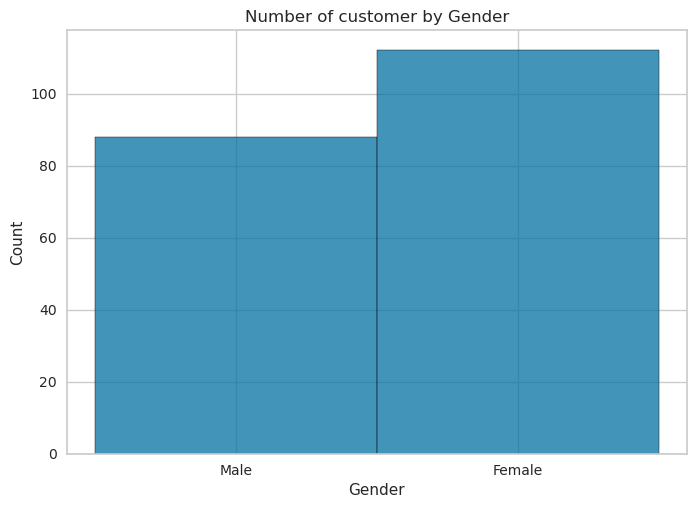

In [9]:
sns.histplot(df['Gender'])
plt.title('Number of customer by Gender')

In [10]:
df['Age'].head()

0    19
1    21
2    20
3    23
4    31
Name: Age, dtype: int64

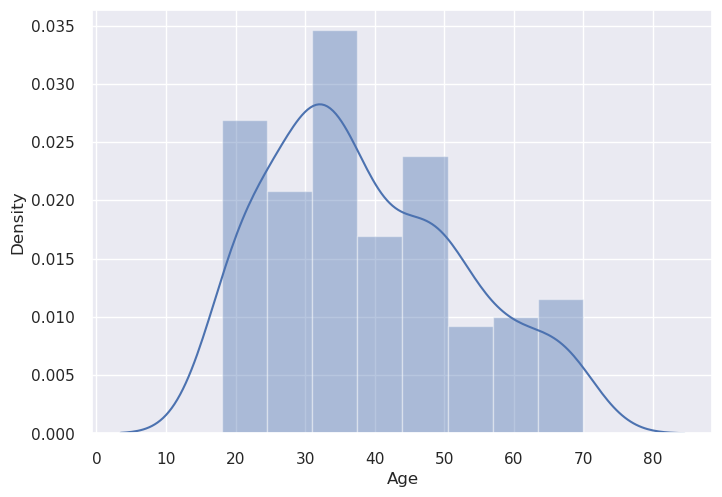

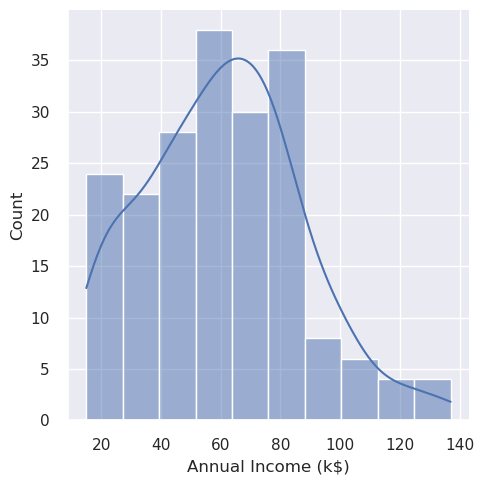

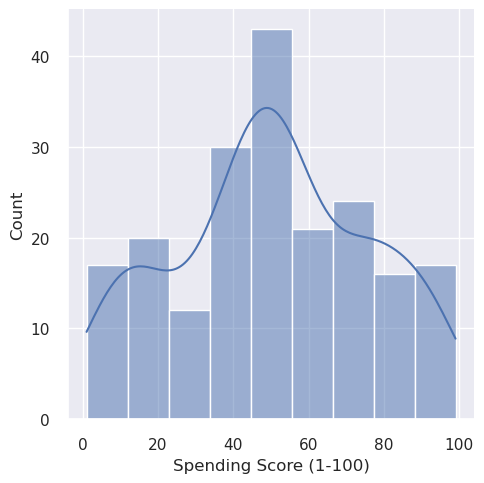

In [11]:
sns.set()
#fig, axes = plt.subplots(3,1)

sns.distplot(df['Age'], kde = True)
sns.displot(df['Annual Income (k$)'], kde = True)
sns.displot(df['Spending Score (1-100)'], kde = True)  

In [12]:
print('Min Age:',df['Age'].min(),'Max Age:',df['Age'].max())

Min Age: 18 Max Age: 70


# 2.Clustering
## 2.1 Using K-Means.

In [13]:
LE=LabelEncoder()
df['Gender']=df[['Gender']].apply(LE.fit_transform)
df['Gender'].dtypes

dtype('int64')

In [14]:
df.head()
# 1=Male, 0=Female

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Elbow Method to determine the number of clusters to be formed:


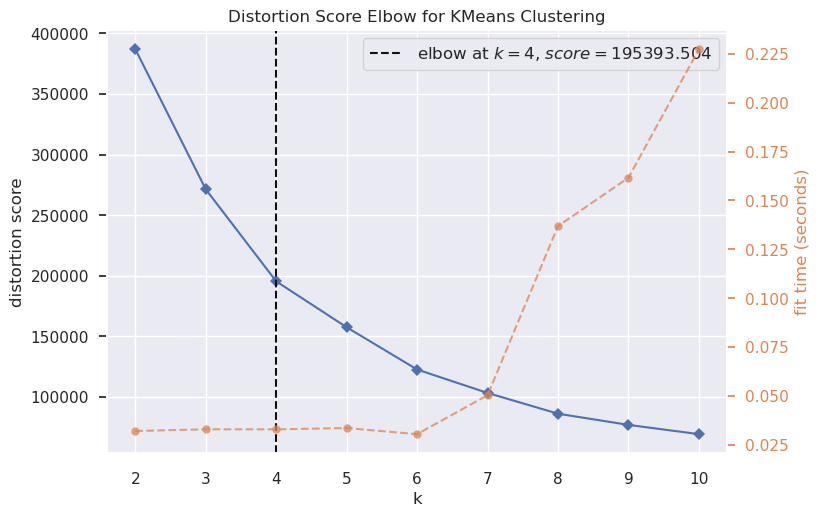

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

In [16]:
model = KMeans(n_clusters = 4)
cluster = model.fit_predict(df)
df['Clusters'] = cluster

## 2.2 Evaluating Models.

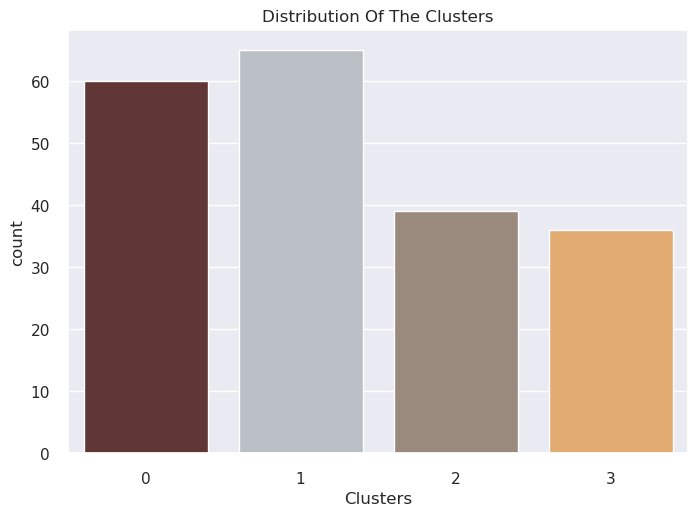

In [17]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

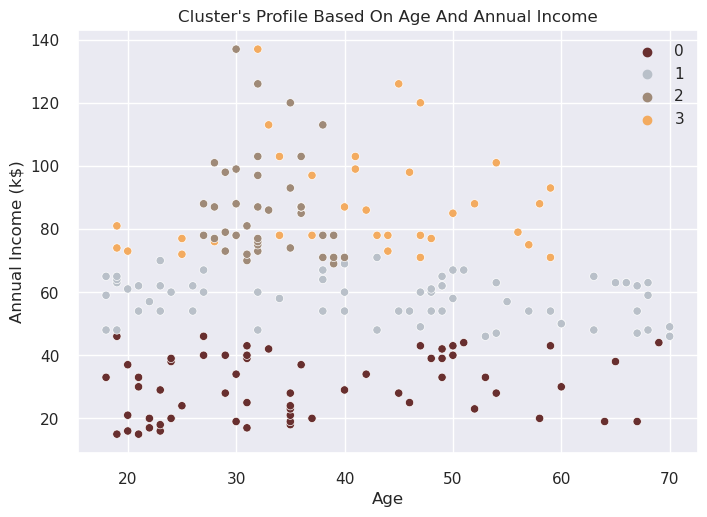

In [18]:
pl = sns.scatterplot(data = df,x=df["Age"], y=df["Annual Income (k$)"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Age And Annual Income")
plt.legend()
plt.show()

Cluster 0: Annual Income $50K-$70K
Cluster 1: High Annual Income with Age < 30 and Age > 40
Cluster 2: Low Annual Income < $40K
Cluster 3: High Annual Income with Age between 30-40


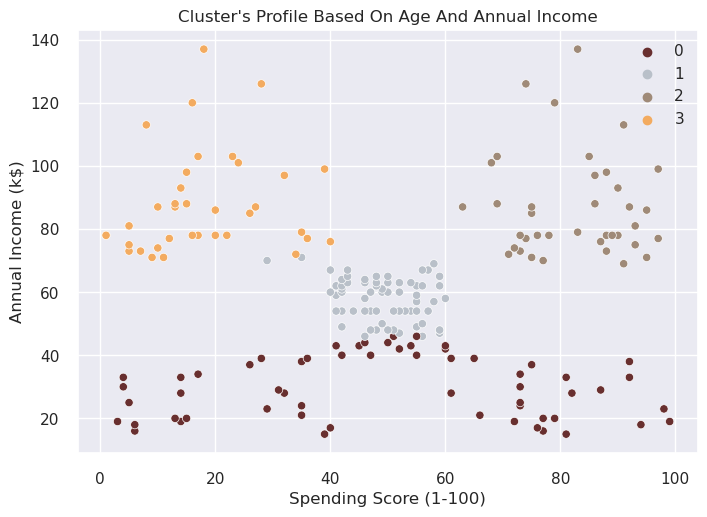

In [19]:
pl = sns.scatterplot(data = df,x=df["Spending Score (1-100)"], y=df["Annual Income (k$)"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Age And Annual Income")
plt.legend()
plt.show()

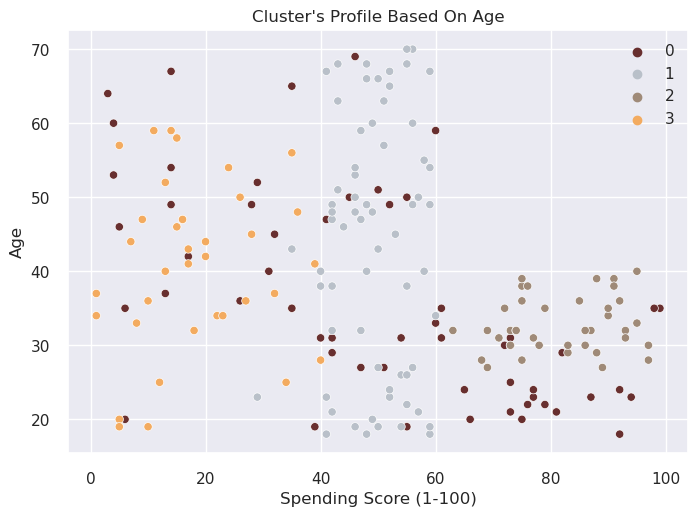

In [20]:
pl = sns.scatterplot(data = df,x=df["Spending Score (1-100)"], y=df["Age"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Age")
plt.legend()
plt.show()

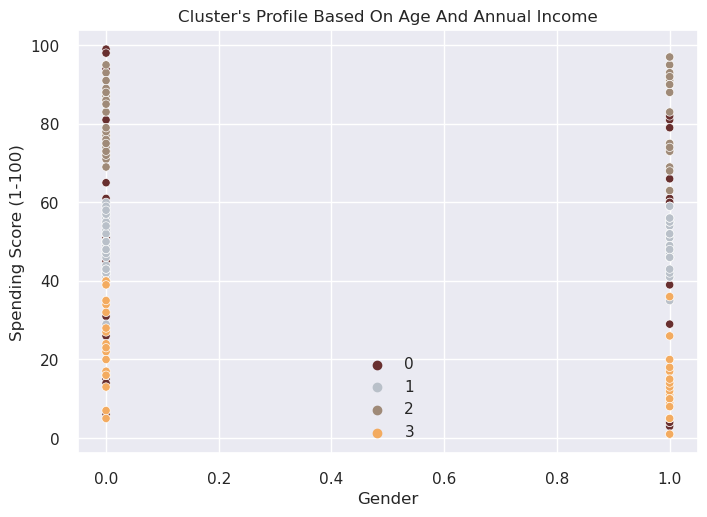

In [21]:
pl = sns.scatterplot(data = df,x=df["Gender"], y=df["Spending Score (1-100)"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Age And Annual Income")
plt.legend()
plt.show()

# 3. Observation

Customers aged between 30 and 40 years old have the highest spending score. The reason could be they are having stable and high Annual Income, which is logical that income is proportional to working experience. Besides, Female also tends to has higher spending score, which is also reasonable since they would buy groceries (necessary shopping) and fashionary products (leisure shopping).